XGBoost + k-fold CV + Feature Importance, LightGBM Classifier in Python,

In [ ]:
import numpy as nm  
import matplotlib.pyplot as plt
import pandas as pd  
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

data= pd.read_csv('/content/drive/My Drive/Dataset/Wholesale customers data.csv')
data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [ ]:
X = data.iloc[:,1:7].values
y = data.iloc[:,0].values
X=pd.DataFrame(X)

In [ ]:
y

array([2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1,
       1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2,
       1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1,
       1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2,

In [ ]:
# convert labels into binary values
y[y == 2] = 0
y[y == 1] = 1

In [ ]:
X.head()

,0,1,2,3,4,5
0,3,12669,9656,7561,214,2674
1,3,7057,9810,9568,1762,3293
2,3,6353,8808,7684,2405,3516
3,3,13265,1196,4221,6404,507
4,3,22615,5410,7198,3915,1777


In [ ]:
#y.head()

In [ ]:
import xgboost as xgb
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
from xgboost import XGBClassifier


# declare parameters
params = {
            'objective':'binary:logistic',
            'max_depth': 4,
            'alpha': 10,
            'learning_rate': 1.0,
            'n_estimators':100
        }         
           
          
# instantiate the classifier 
xgb_clf = XGBClassifier(**params)


# fit the classifier to the training data
xgb_clf.fit(X_train, y_train)

XGBClassifier(alpha=10, learning_rate=1.0, max_depth=4)

In [ ]:
print(xgb_clf)

XGBClassifier(alpha=10, learning_rate=1.0, max_depth=4)


In [ ]:
y_pred = xgb_clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print('XGBoost model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

XGBoost model accuracy score: 0.8864


In [ ]:
from xgboost import cv

params = {"objective":"binary:logistic",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

In [ ]:
xgb_cv = cv(dtrain=data_dmatrix, params=params, nfold=3,num_boost_round=50, early_stopping_rounds=10, metrics="auc", as_pandas=True, seed=123)

In [ ]:
xgb_cv.head()

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.908382,0.009554,0.882908,0.024131
1,0.925380,0.029252,0.894782,0.034720
2,0.944012,0.021588,0.928711,0.033469
3,0.945575,0.022581,0.928124,0.030325
4,0.956918,0.003812,0.948260,0.014974


In [ ]:
'''
feature_importance = xgb.plot_importance(xgb_clf)
sorted_idx = nm.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), nm.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')
'''

"\nfeature_importance = xgb.plot_importance(xgb_clf)\nsorted_idx = nm.argsort(feature_importance)\nfig = plt.figure(figsize=(12, 6))\nplt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')\nplt.yticks(range(len(sorted_idx)), nm.array(X_test.columns)[sorted_idx])\nplt.title('Feature Importance')\n"

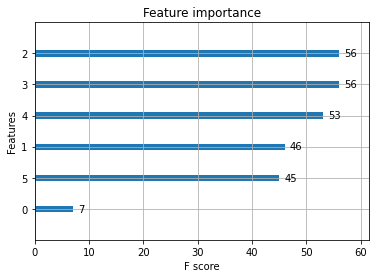

<Figure size 1152x864 with 0 Axes>

In [ ]:
xgb.plot_importance(xgb_clf)
plt.figure(figsize = (16, 12))
plt.show()

XGBoost hyperparameters tuning

In [ ]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180,
        'seed': 0
    }

In [ ]:
def objective(space):
    clf=xgb.XGBClassifier(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [( X_train, y_train), ( X_test, y_test)]
    
    clf.fit(X_train, y_train,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)
    

    pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred>0.5)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [ ]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

SCORE:
0.3484848484848485
SCORE:
0.6515151515151515
SCORE:
0.6515151515151515
SCORE:
0.3484848484848485
SCORE:
0.8863636363636364
SCORE:
0.3484848484848485
SCORE:
0.3484848484848485
SCORE:
0.3484848484848485
SCORE:
0.8863636363636364
SCORE:
0.8712121212121212
SCORE:
0.3484848484848485
SCORE:
0.3484848484848485
SCORE:
0.8863636363636364
SCORE:
0.8863636363636364
SCORE:
0.3484848484848485
SCORE:
0.3484848484848485
SCORE:
0.3484848484848485
SCORE:
0.3484848484848485
SCORE:
0.8863636363636364
SCORE:
0.8863636363636364
SCORE:
0.3484848484848485
SCORE:
0.8712121212121212
SCORE:
0.3484848484848485
SCORE:
0.6515151515151515
SCORE:
0.8863636363636364
SCORE:
0.3484848484848485
SCORE:
0.8712121212121212
SCORE:
0.8939393939393939
SCORE:
0.3484848484848485
SCORE:
0.3484848484848485
SCORE:
0.3484848484848485
SCORE:
0.6515151515151515
SCORE:
0.8939393939393939
SCORE:
0.3484848484848485
SCORE:
0.3484848484848485
SCORE:
0.3484848484848485
SCORE:
0.3484848484848485
SCORE:
0.3484848484848485
SCORE:
0.871

LightGBM Classifier in Python

In [ ]:
# build the lightgbm model
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)

LGBMClassifier()

In [ ]:
# predict the results
y_pred=clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

LightGBM Model accuracy score: 0.9015


Compare train and test set accuracy for overfitting

In [ ]:
y_pred_train = clf.predict(X_train)

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 1.0000


In [ ]:
print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.9015


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[37  9]
 [ 4 82]]

True Positives(TP) =  37

True Negatives(TN) =  82

False Positives(FP) =  9

False Negatives(FN) =  4


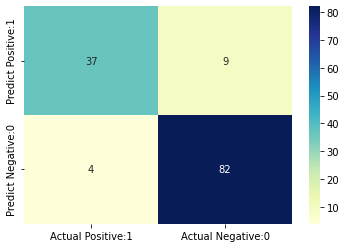

In [ ]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.80      0.85        46
           1       0.90      0.95      0.93        86

    accuracy                           0.90       132
   macro avg       0.90      0.88      0.89       132
weighted avg       0.90      0.90      0.90       132

